# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
from final_exploration import *

# 1)Acquired:

In [2]:
#acquiring the data with pickle
df=pd.read_pickle('prepared.pkl')

# Takeaways:

# 2)Prepared:

In [3]:
#preparing the dataframe 
df=prepare_df(df)

In [4]:
df.shape

(2053, 34)

In [5]:
#splitting up the data to train,val,test
train, validate, test= train_validate_test_split(df)

In [6]:
#shapes
train.shape,validate.shape,test.shape

((1149, 34), (493, 34), (411, 34))

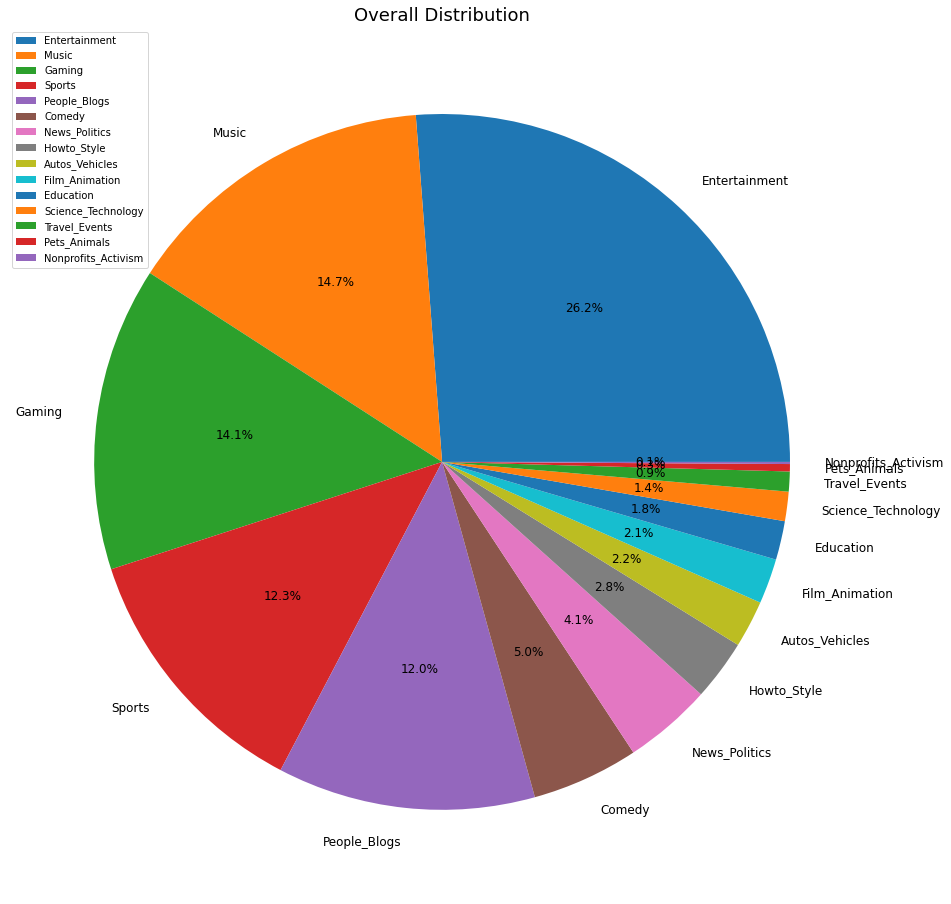

In [7]:
#overall distribution of all category from the dataframe 
category_views(df)

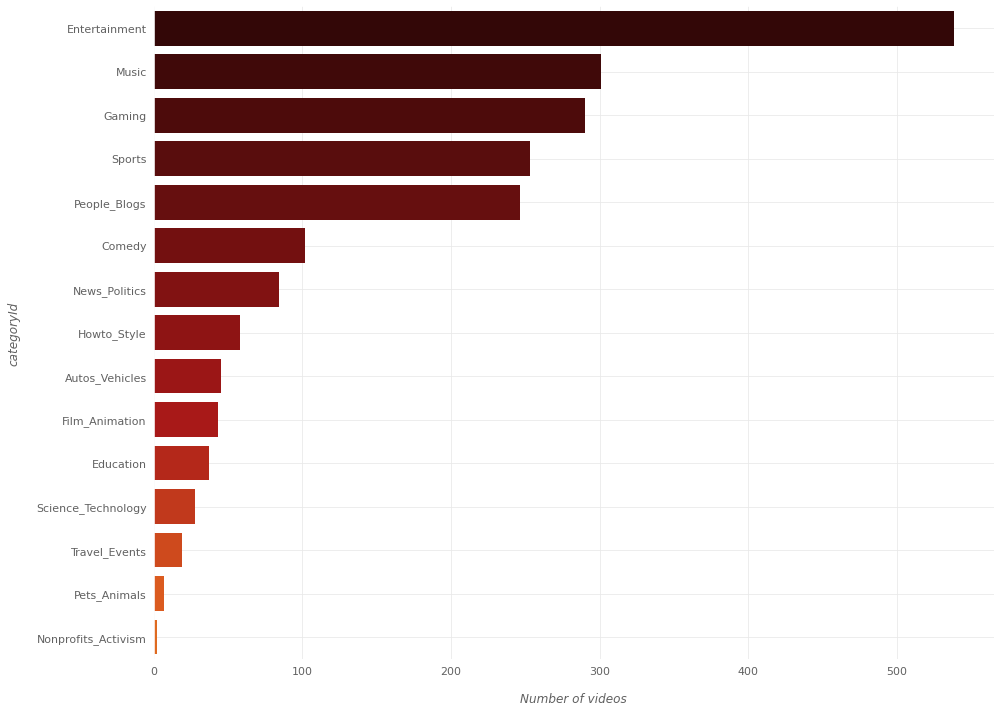

In [8]:
graph_overall(df)

# Dictianary 
# Data Dictionary


| Feature               | Definition       | Count    | Dtype      |
:-----------------------|:---------------|:---------|:-----------|
video_id                | How youtube identify the video            | non-null | object     |
title                   | video title           | non-null | object     |
publishedAt             | date video was published           | non-null | datetime64 |
channelTitle            | Channel Title           | non-null | object     |
categoryId              | What type of Category      | non-null | object     |
trending_date           | When the video became trending            | non-null | datetime64 |
tags                    | tags in the video           | non-null | object     |
view_count              | Amount of views the video acquired            | non-null | int64      |
likes                   | Amount of likes the video acquired           | non-null | int64      |
comment_count           | Amount of comment the video acquired           | non-null | int64      |
thumbnail_link          | If video has a thimnbnail link           | non-null | object     |
comments_disabled       | Comments disabled or enabled           | non-null | bool       |
ratings_disabled        | Ratings disabled or enabled           | non-null | bool       |
description             | Description the video in the description           | non-null | object     |
duration                | How long is the video            | non-null | int64      |
captions                | 9536           | non-null | bool       |
region                  | What location we pulled it from     | non-null | object     |
rank                    | What rank the video placed at        | non-null | int64      |
top_25 (target)         | Top 25 videos by region           | non-null | int64      |
age                     | Age of the video           | non-null | float64    |
engagement              | 9536           | non-null | float64    |
sponsored               | 9536           | non-null | int64      |
num_of_tags             | 9536           | non-null | int64      |
word_bank               | 9536           | non-null | object     |
cleaned_tags            | 9536           | non-null | object     |
cleaned_desc            | 9536           | non-null | object     |
title_in_description    | 9536           | non-null | int64      |
title_in_tags           | 9536           | non-null | int64      |
pct_tags_in_description | 9536           | non-null | float64    |
title_lengths           | 9536           | non-null | int64      |
desc_lengths            | 9536           | non-null | int64      |
tags_length             | 9536           | non-null | int64      |

# 3)Exploration:

`What we did:`

- We explored the differences in category
- Differences in regions
- What effect views/likes more
- Do comments effect the amount of views a video would have
- Does freedom of words effect views

# Hypotheses:

`Hypotheses1:`Are disable comments optaining more views the none disable comments:

- `H0-`Disable comments optain more views then not disable 

- `Ha-`non disabled comments get more views then disable comments

`Hypotheses2:`Does comment value and views have a corralantioin together??

- `H0-`Comments and view have a high corralations

- `Ha-`Comments and views dont have high corraltions 

`Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

`Hypotheses4:`What is the most frequent occuring bigrams per category 

`Hypotheses5:`Total count of words per category,Does category effect total amount of words??


`Hypotheses6:`Are some region more active then others??? for example likes/views

# `Hypotheses1:`Are disable comments optaining more views the none disable comments:

`H0-`Disable comments optain more views then not disable 

`Ha-`non disabled comments get more views then disable comments

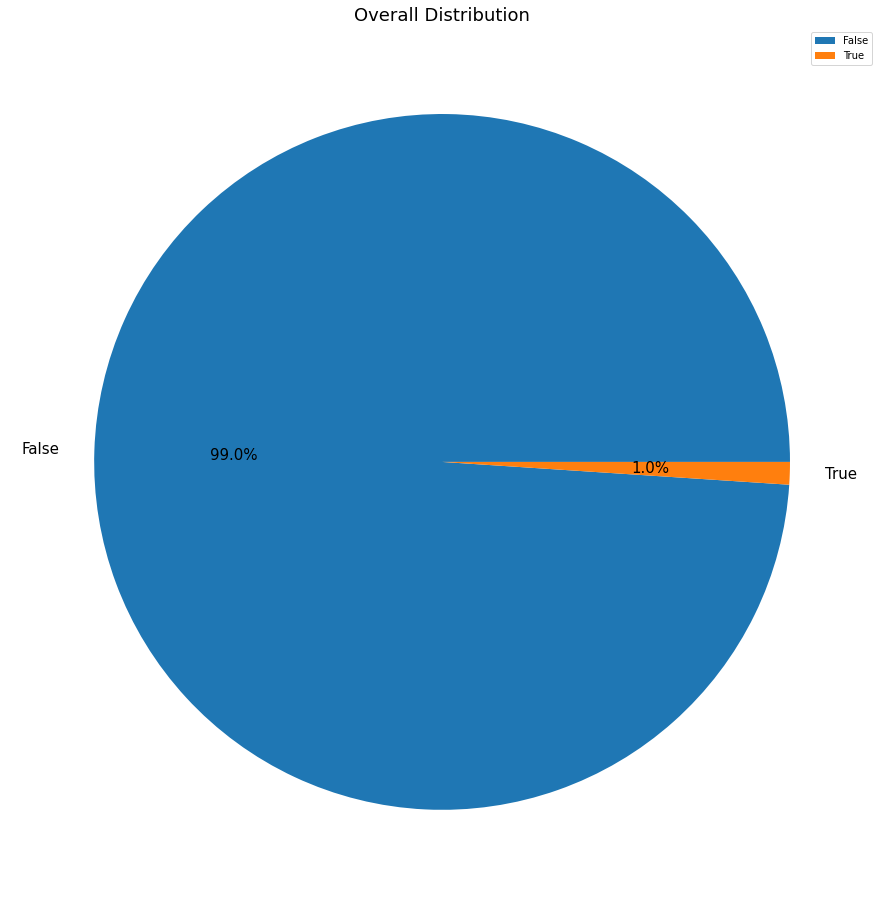

In [9]:
disable_comments(train)

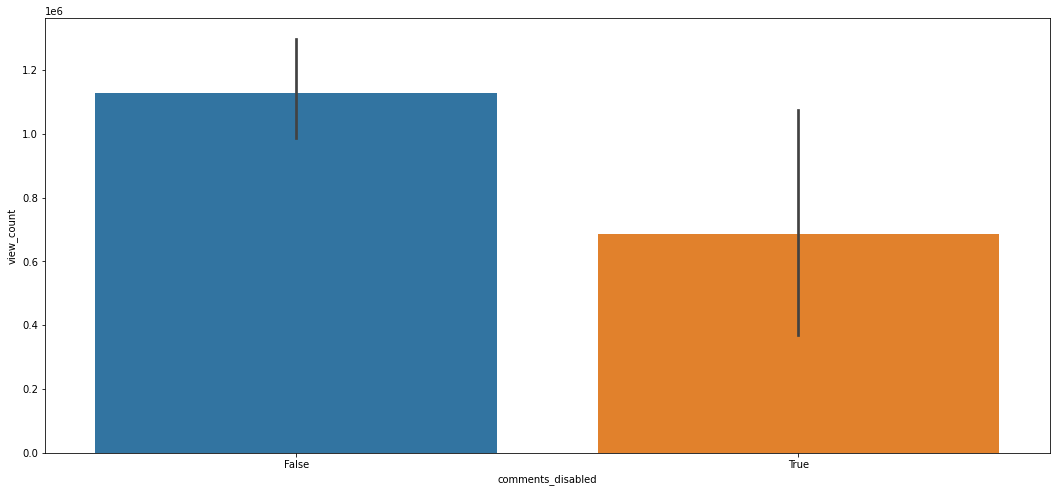

In [10]:
disable_comments2(train)

In [11]:
#stats test anova:needed
comments_stats(train)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to view_count


## Spotlight - `Disable comments`


- **Question:** Are disable comments optaining more views the none disable comments
 
- **Answer:** Yes disable comments do effect views by a decent amount 

### Takeaways:
    
- Non disable comments take up about 99 percent of the total comment

- Even tho disable comments take up alot more the gap on views isn't as great as we would've thought 


# `Hypotheses2:`Does comment value and views have a corralantioin together??

`H0-`Comments and view have a high corralations

`Ha-`Comments and views dont have high corraltions 

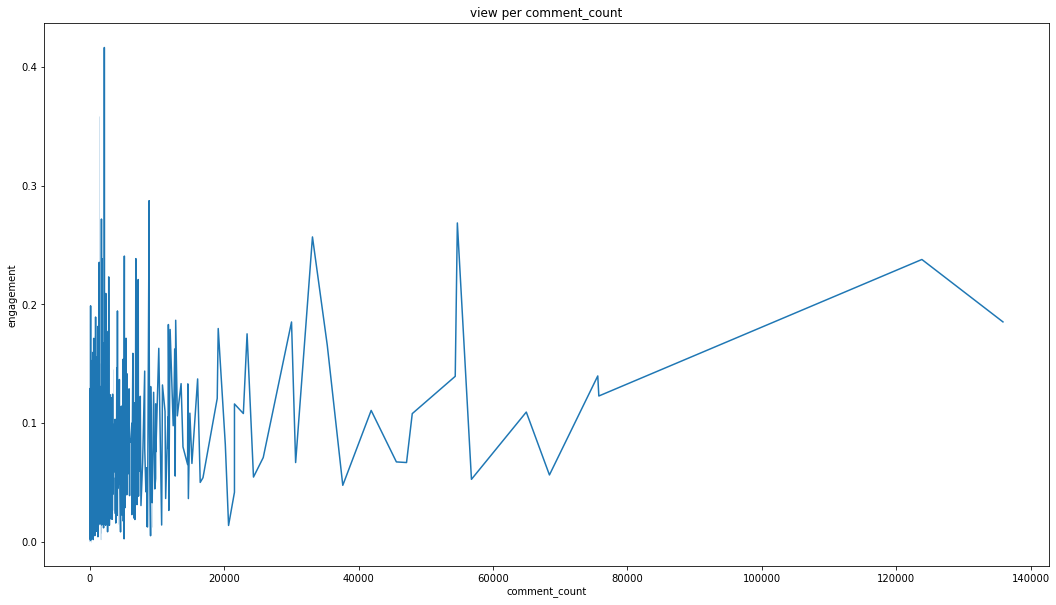

In [12]:
comments_views(train)

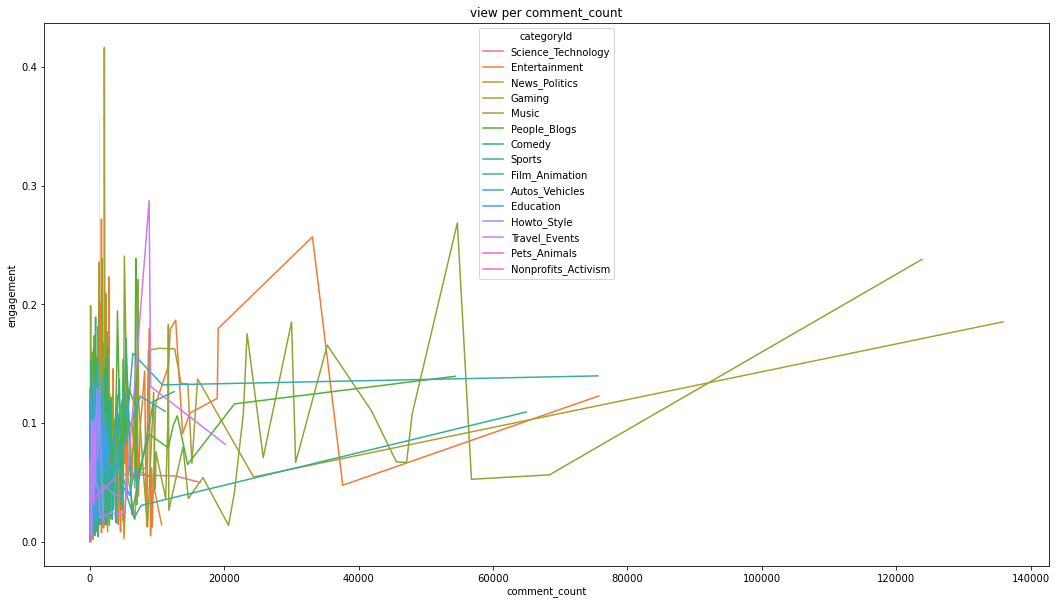

In [13]:
comments_views2(train)

In [14]:
comments_stats2(train)

We reject the null hypothesis
We can say that we have confidence that comment_count is related to engagement


## Spotlight - `Comment value/engament`


- **Question:** Does comment value and engament have a corralantioin together??
 
- **Answer:** Yes comment values do have a corralantioin with views 


### Takeaways:
    
- Entertainment has the highest engament/comment count

- Look like most videos dont get past the 100k comment count but 2

- 25k seem to be the average comment count 

# `Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

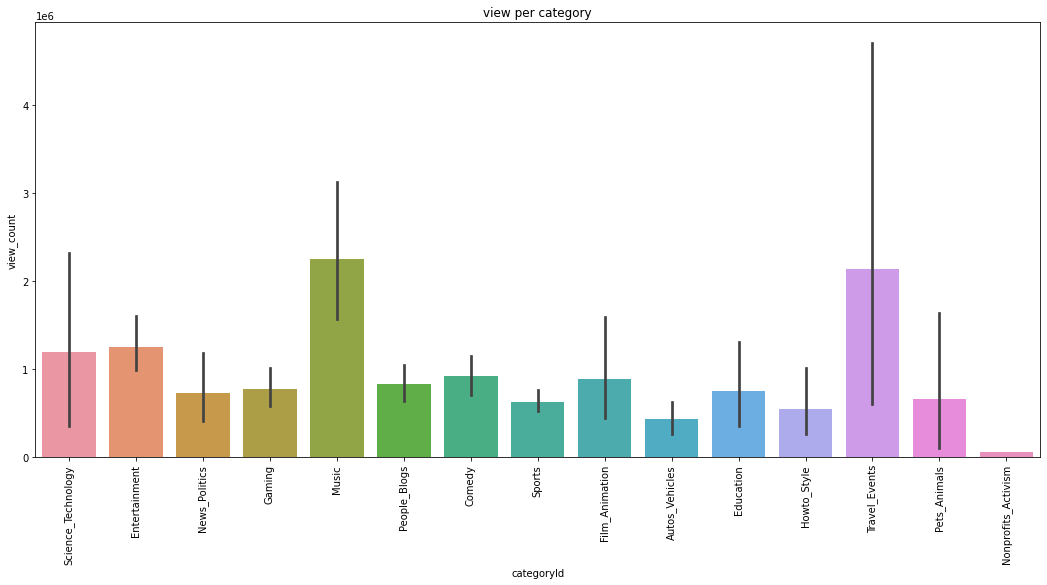

In [15]:
#comparing likes with categorys
category_views2(train)

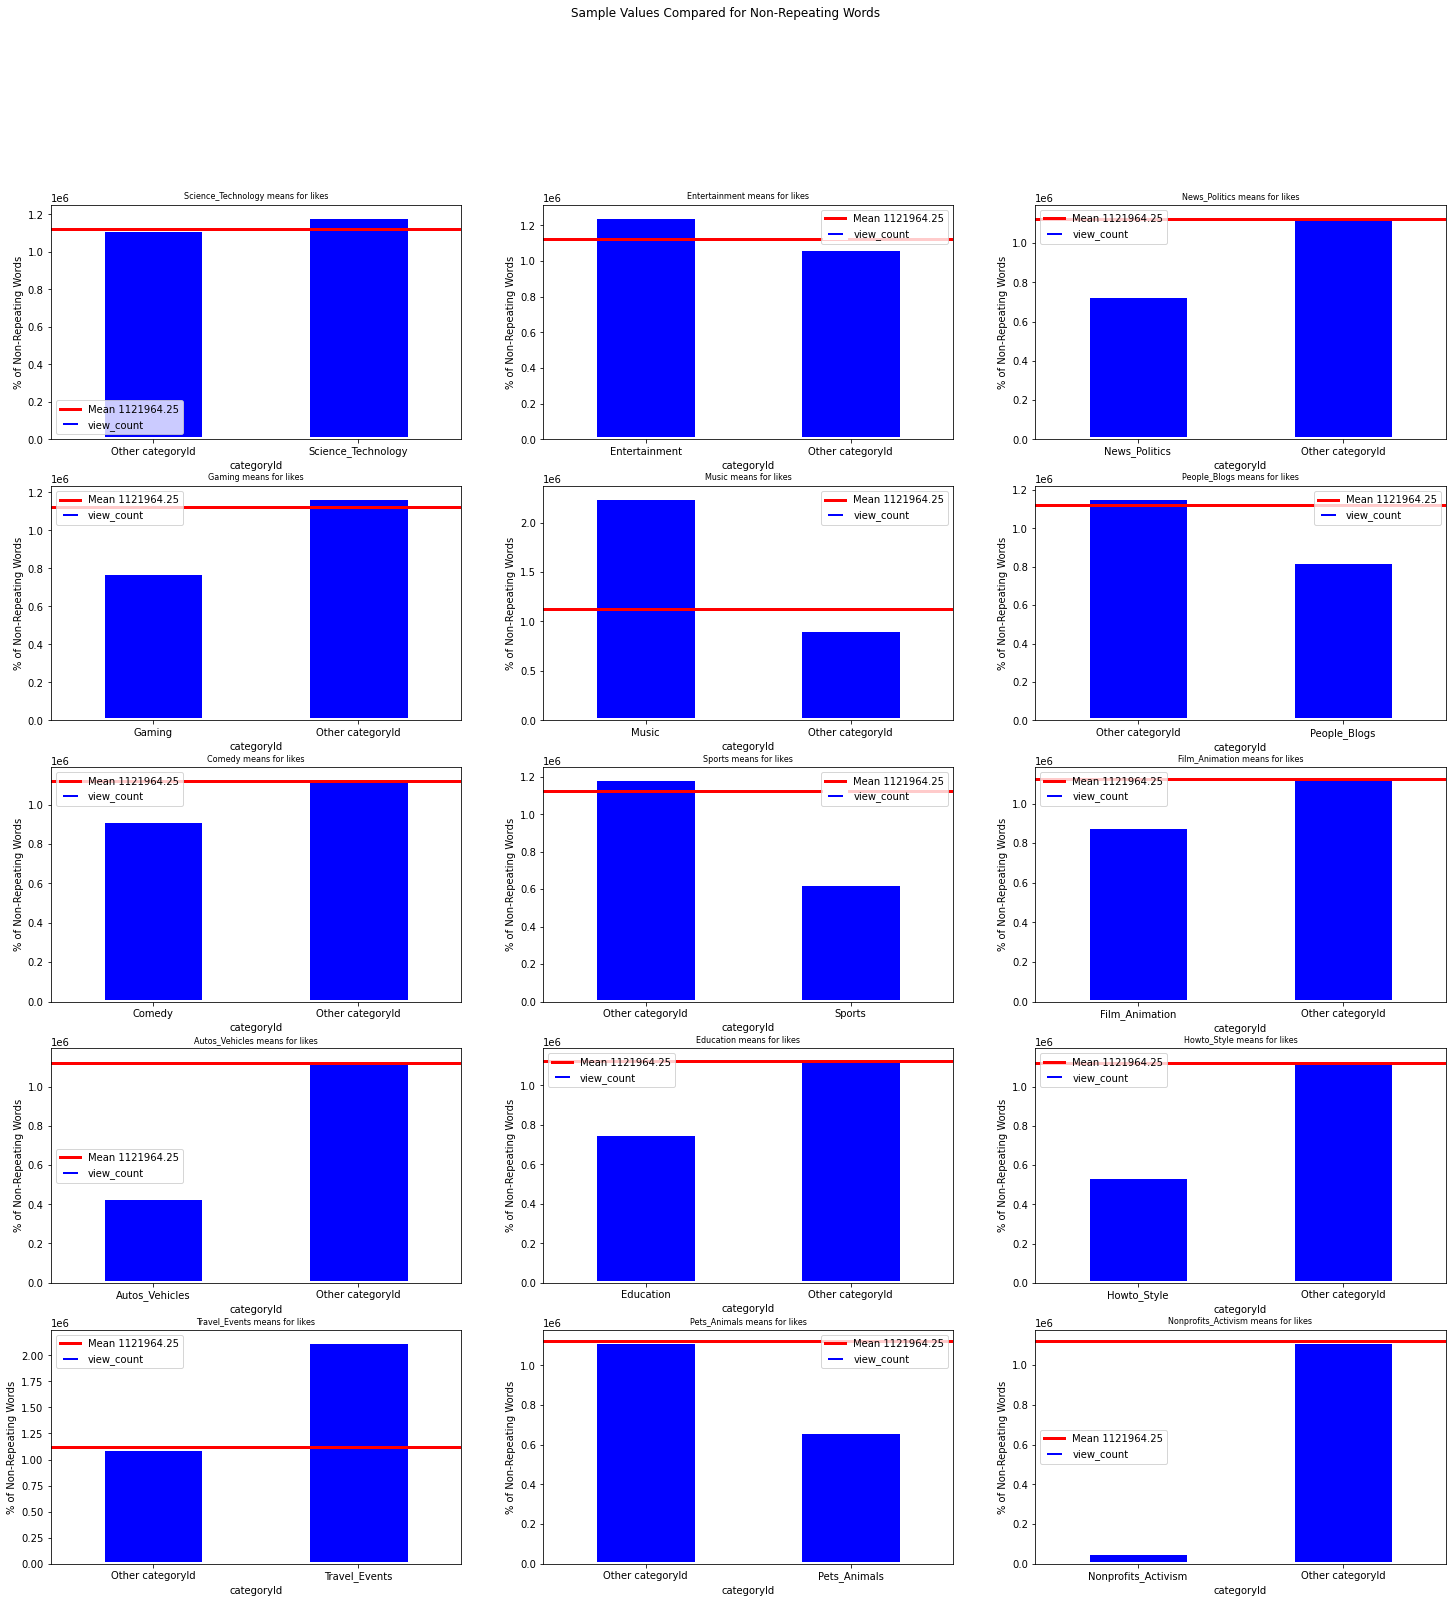

view_count <-target | categoryId <-population name | Science_Technology <-sample name
We fail to reject the null hypothesis ( Science_Technology as a sample has equal mean values to categoryId as a population regarding likes ) t=0.13638, p=0.89423
----------
view_count <-target | categoryId <-population name | Entertainment <-sample name
We fail to reject the null hypothesis ( Entertainment as a sample has equal mean values to categoryId as a population regarding likes ) t=0.79515, p=0.42715
----------
view_count <-target | categoryId <-population name | News_Politics <-sample name
We fail to reject the null hypothesis ( News_Politics as a sample has equal mean values to categoryId as a population regarding likes ) t=-1.87517, p=0.06742
----------
view_count <-target | categoryId <-population name | Gaming <-sample name
We reject the null Hypothesis ( G̶a̶m̶i̶n̶g̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶

In [16]:
#comparing likes with categorys
category_views3(train)

## Spotlight - `Category`


- **Question:** Does the category effect the amount of like receive from the video? 
 
- **Answer:** short answer yes it does some of them are more active then others 
### Takeaways:
- Music and Entertainment are the highest liked

- Sport,new politics,and non profits are the lowest liked

# `Hypotheses4:`What is the most frequent occuring bigrams per category 

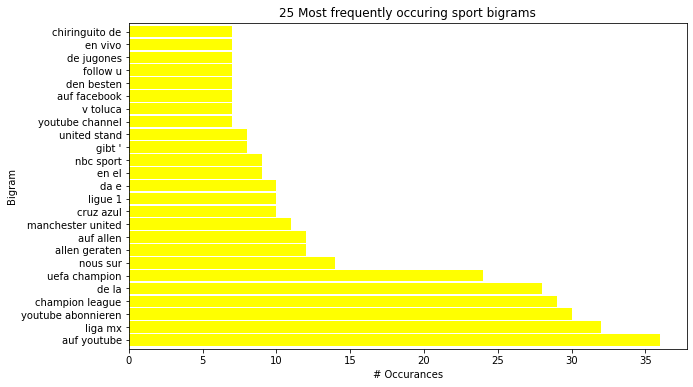

In [17]:
sport_biograms(train)

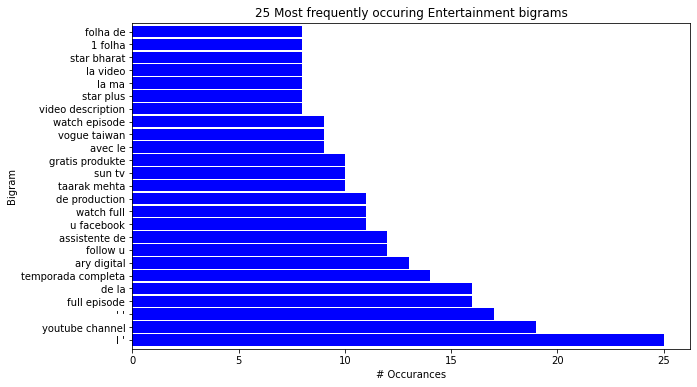

In [18]:
entertainment_biograms(train)

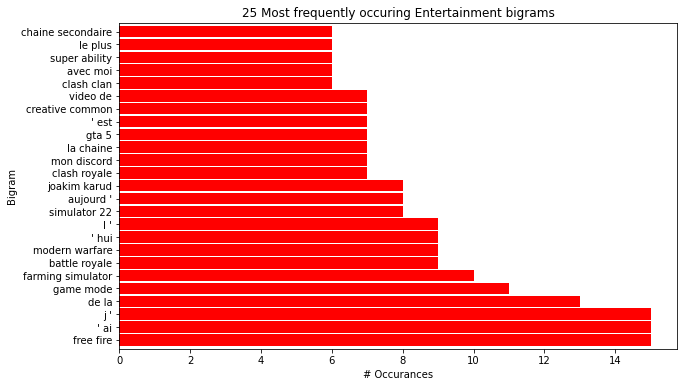

In [19]:
gaming_biograms(train)

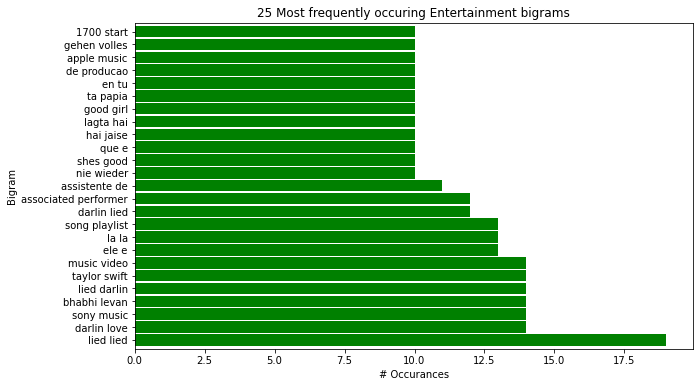

In [20]:
Music_biograms(train)

## Spotlight - `Bigrams`


- Question: What is the most frequent occuring bigrams per category 
 
- Answer: taylor swift for music/clash clan for gaming/top rank for sports 
### Takeaways:
    
- no really take aways from this beside taylor swift always being popular in music and clash of clan always being popular for years 

# `Hypotheses5:`Total count of words per category,Does category effect total amount of words??

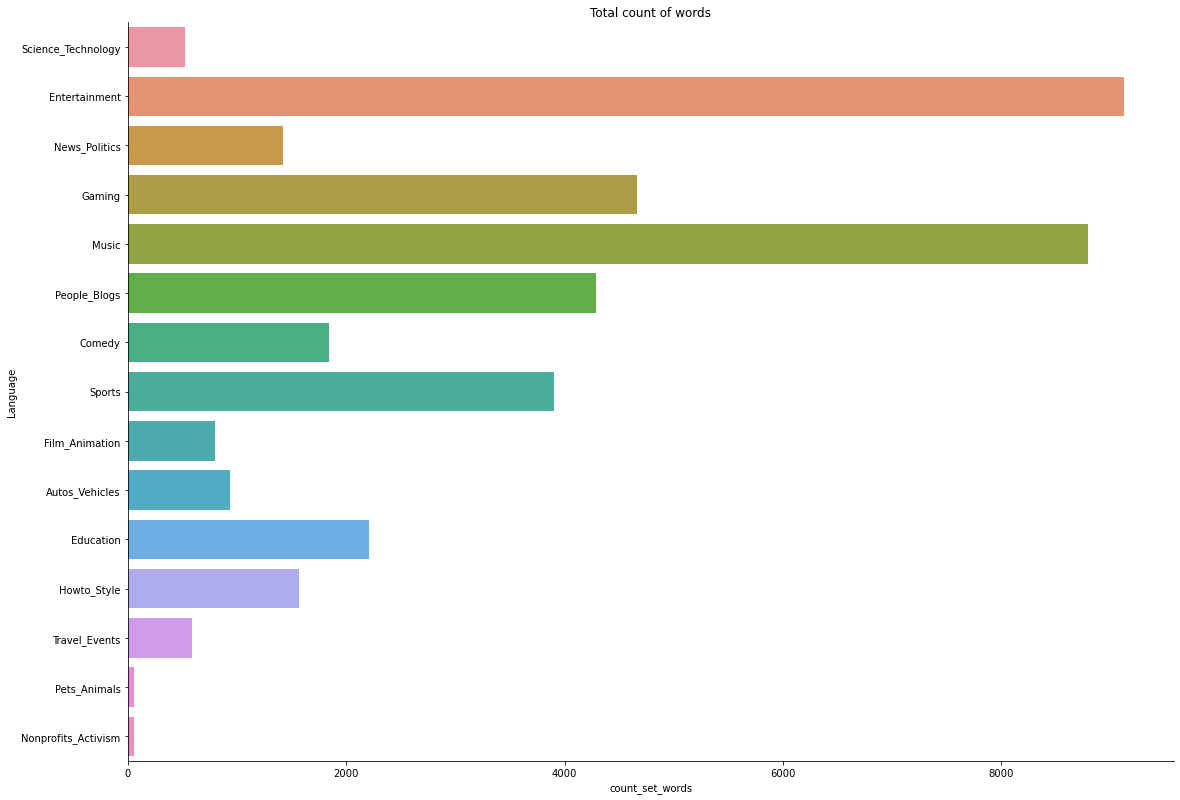

0      527
1     9121
2     1426
3     4659
4     8789
5     4286
6     1844
7     3908
8      797
9      937
10    2214
11    1567
12     588
13      60
14      57
Name: count_set_words, dtype: int64


In [21]:
#total word count graph
word_count(train)

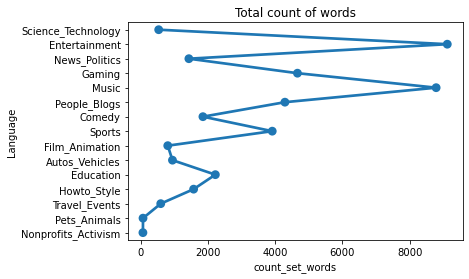

In [22]:
#total word count graph
word_count2(train)

## Spotlight - `Total count`


- **Question:** Total count of words per category,Does category effect total amount of words?? 
 
- **Answer:** Entertainment and music are the highest while the lowest are nonprofit and pet animals
### Takeaways:
    
- Entertainment has the highest word count while music is second

- Lowest word count is nonprofit but has the highest engament


# `Hypotheses6:`Are some region more active then others??? for example likes/views

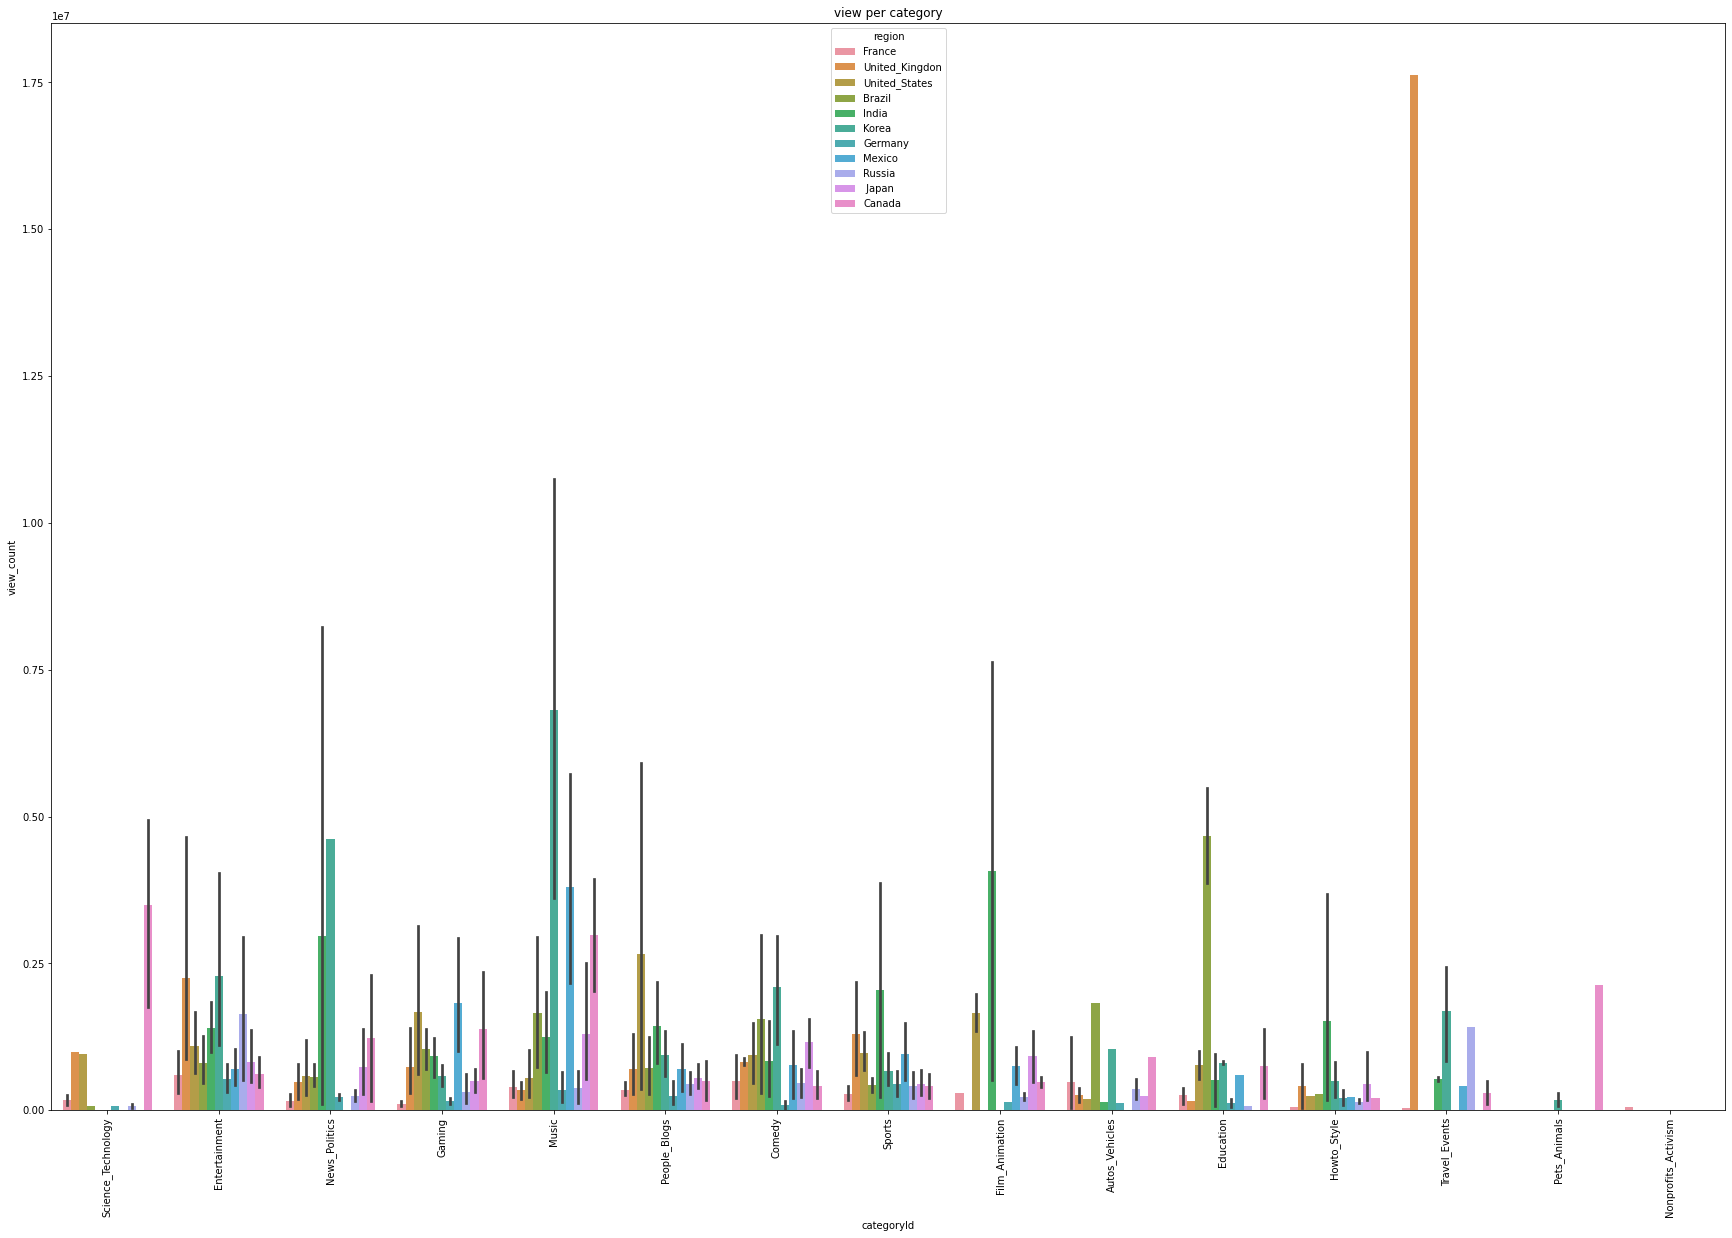

In [23]:
#view count compared by region/category 
region_category(train)

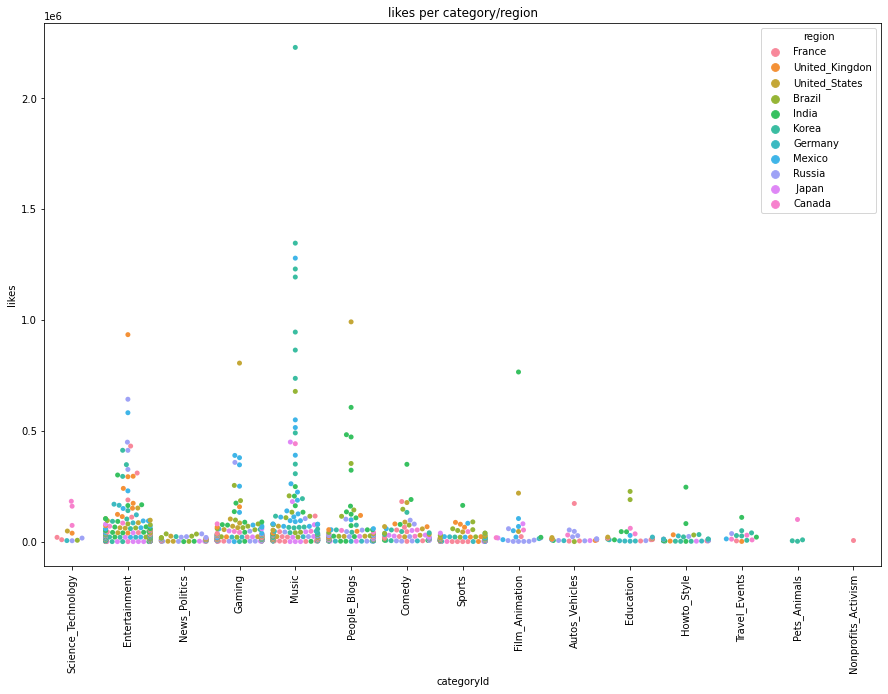

In [24]:
#likes compared by region
region_category2(train)

## Spotlight - `Region activities`


- **Question:** Are some region more active then others??? for example likes/views
 
- **Answer:** Yes some regions have different trending views then others for example korea has more views on new policies then mexico
### Takeaways:
- All videos went viral on nov1,2022 
- Most video went viral after 2 days
- One video went viral on Oct3,2022

# Exploration Takeaways:
- Entertainment might have been the highest overall but doesnt mean it was liked/or viewed the most.Just means most videos are categories as entertainment
- Music/Entertainment have the highest words count but it could be because they both take up at least 15 percent and above of the whole dataframe
- Region effect on trending video alot because in some country music isnt the highest or entertainment 
- Having the comments enabled doesnt really effect the like/views to high so i think it doesnt matter if the video is bad or good as longest it gets views or some likes.


# 4)Modeling:


# Takeaways:
    
- 

- 

- 

# 5)Best Modeling: